In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
from sklearn.metrics import r2_score, accuracy_score

def acc(model, train, test, target, target_test, is_round=True):
    # Calculation accuracy score for train and test prediction
    # is_round=True - for classification task only, for regression task is_round=False
    
    if is_round:
        # Classification task
        ytrain = model.predict(train).astype(int)
        ytest = model.predict(test).astype(int)
        acc_train = round(accuracy_score(target, ytrain), 2)
        acc_test = round(accuracy_score(target_test, ytest), 2)
    else:
        # Regression task
        ytrain = model.predict(train)
        ytest = model.predict(test)
        acc_train = round(r2_score(target, ytrain), 2)
        acc_test = round(r2_score(target_test, ytest), 2)
        
    print('Accuracy for train prediction =', acc_train)
    print('Accuracy for test prediction =', acc_test,'\n')
    
    return ytrain, ytest

from sklearn.metrics import classification_report
def classification_report_print(y_true, y_pred, title, target_names=['0', '1']):
    print(f'Classification report {title}:')
    print(classification_report(y_true, y_pred, target_names=target_names))

In [3]:
from sklearn.tree import DecisionTreeClassifier
#gridSearchCV

data precess

In [4]:
train_data = pd.read_csv("train.csv")
train_data.describe()
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [23]:
test_data = pd.read_csv("test.csv")

test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
X_train = train_data[['Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Embarked']]
X_train=pd.get_dummies(X_train, columns = ['Embarked'])
X_train=pd.get_dummies(X_train, columns = ['Sex'])
#X_train = X_train.replace('female', 0)
#X_train = X_train.replace('male', 1)

y_train = train_data.Survived
X_train.isnull().sum()
X_train['Age'].fillna(29.0, inplace=True)
X_train.isnull().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
Sex_female    0
Sex_male      0
dtype: int64

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.30, random_state=42)

In [24]:
test = test_data[['Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Embarked']]
test=pd.get_dummies(test, columns = ['Embarked'])
test=pd.get_dummies(test, columns = ['Sex'])
#X_test = X_test.replace('female', 0)
#X_test = X_test.replace('male', 1)

test['Age'].fillna(29.0, inplace=True)
test['Fare'].fillna(32.0, inplace=True)

In [10]:
test_data.head()

,Pclass,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,3,34.5,0,0,7.8292,0,1,0,0,1
1,3,47.0,1,0,7.0000,0,0,1,1,0
2,2,62.0,0,0,9.6875,0,1,0,0,1
3,3,27.0,0,0,8.6625,0,0,1,0,1
4,3,22.0,1,1,12.2875,0,0,1,1,0


decision_tree

In [78]:
DecisionTreeClassifier?

In [13]:
from sklearn.model_selection import GridSearchCV

Tree = DecisionTreeClassifier(random_state = 0)

param_grid = {'min_samples_leaf': [i for i in range(2,10)], 'max_depth' : [i for i in range(2, 7)], 'max_features' : ['auto']}
tree_CV = GridSearchCV(estimator=Tree, param_grid=param_grid, verbose=False)
tree_CV.fit(X_train, y_train)
print(tree_CV.best_params_, '\n')

{'max_depth': 6, 'max_features': 'auto', 'min_samples_leaf': 8} 



In [14]:
print("훈련 세트 정확도 : {:.3f}".format(tree_CV.score(X_train, y_train)))
print("테스트 세트 정확도 : {:.3f}".format(tree_CV.score(X_test, y_test)))

훈련 세트 정확도 : 0.833
테스트 세트 정확도 : 0.795


In [15]:
ytrain, ytest = acc(tree_CV, X_train, X_test, y_train, y_test, is_round=True)
classification_report_print(y_train, ytrain, 'for training data')
classification_report_print(y_test, ytest, 'for test data')

Accuracy for train prediction = 0.83
Accuracy for test prediction = 0.79 

Classification report for training data:
              precision    recall  f1-score   support

           0       0.81      0.96      0.88       392
           1       0.89      0.62      0.73       231

    accuracy                           0.83       623
   macro avg       0.85      0.79      0.81       623
weighted avg       0.84      0.83      0.83       623

Classification report for test data:
              precision    recall  f1-score   support

           0       0.77      0.92      0.84       157
           1       0.84      0.62      0.72       111

    accuracy                           0.79       268
   macro avg       0.81      0.77      0.78       268
weighted avg       0.80      0.79      0.79       268



In [9]:
history = Tree.fit(X_train, y_train)
print("훈련 세트 정확도 : {:.3f}".format(Tree.score(X_train, y_train)))
print("테스트 세트 정확도 : {:.3f}".format(Tree.score(X_test, y_test)))

훈련 세트 정확도 : 0.976
테스트 세트 정확도 : 0.816


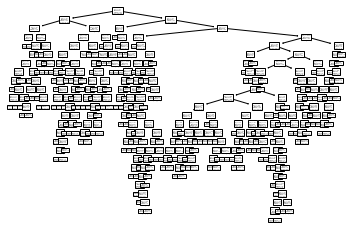

In [10]:
from sklearn import tree
from matplotlib import pyplot as plt

tree.plot_tree(history)  
plt.show()

decision_tree_with_prunnung

In [16]:
model2 = DecisionTreeClassifier(random_state = 0, max_depth = 10)

In [18]:
history = model2.fit(X_train, y_train)
print("훈련 세트 정확도 : {:.3f}".format(model2.score(X_train, y_train)))
print("테스트 세트 정확도 : {:.3f}".format(model2.score(X_test, y_test)))

훈련 세트 정확도 : 0.939
테스트 세트 정확도 : 0.780


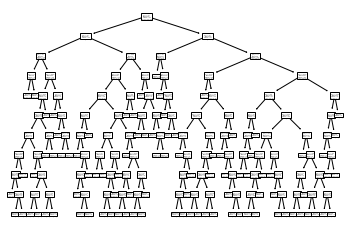

In [13]:
tree.plot_tree(history)  
plt.show()

In [44]:
predictions = model2.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('decision_tree_with_prunnung.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


 특성 중요도

In [14]:
def plot_feature_importances(model):
    #n_features = train_data.shape[1]
    plt.barh(np.arange(6), model.feature_importances_, align = 'center')
    plt.yticks(np.arange(6), ['Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare'])
    plt.xlabel("feature_importances")
    plt.ylabel("feature")
    plt.ylim(-1, 6)

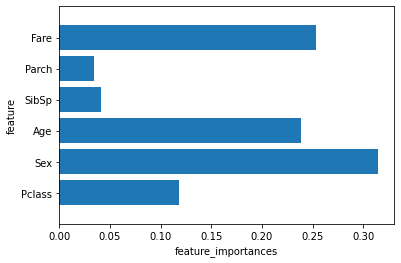

In [15]:
plot_feature_importances(Tree)

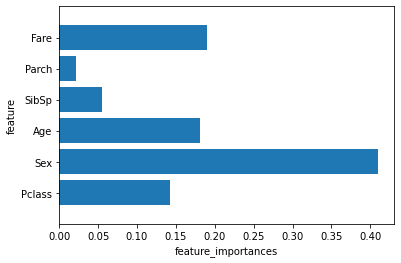

In [16]:
plot_feature_importances(model2)

random_forest

In [19]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
forest = RandomForestClassifier()
param_grid = {'n_estimators': [40, 50, 60], 'min_samples_split': [40, 50, 60], 'min_samples_leaf': [12, 13, 14, 15, 16, 17], 
              'max_features': ['auto'], 'max_depth': [3, 4, 5, 6], 'criterion': ['gini'], 'bootstrap': [False]}
random_forest_CV = GridSearchCV(estimator=forest, param_grid=param_grid, verbose=False)
history = random_forest_CV.fit(X_train, y_train)

print("훈련 세트 정확도 : {:.3f}".format(random_forest_CV.score(X_train, y_train)))
print("테스트 세트 정확도 : {:.3f}".format(random_forest_CV.score(X_test, y_test)))
print(tree_CV.best_params_, '\n')

훈련 세트 정확도 : 0.857
테스트 세트 정확도 : 0.821
{'max_depth': 6, 'max_features': 'auto', 'min_samples_leaf': 8} 



In [21]:
ytrain, ytest = acc(random_forest_CV, X_train, X_test, y_train, y_test, is_round=True)
classification_report_print(y_train, ytrain, 'for training data')
classification_report_print(y_test, ytest, 'for test data')

Accuracy for train prediction = 0.86
Accuracy for test prediction = 0.82 

Classification report for training data:
              precision    recall  f1-score   support

           0       0.84      0.96      0.89       392
           1       0.90      0.69      0.78       231

    accuracy                           0.86       623
   macro avg       0.87      0.82      0.84       623
weighted avg       0.86      0.86      0.85       623

Classification report for test data:
              precision    recall  f1-score   support

           0       0.79      0.94      0.86       157
           1       0.88      0.66      0.75       111

    accuracy                           0.82       268
   macro avg       0.84      0.80      0.81       268
weighted avg       0.83      0.82      0.82       268



In [26]:
predictions = random_forest_CV.predict(test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('random_forest.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


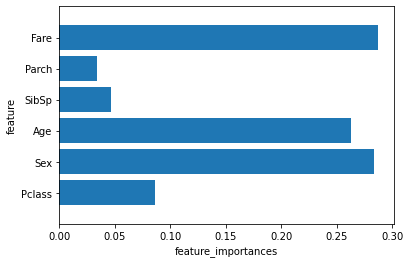

In [21]:
plot_feature_importances(forest)

gradient boosting

In [73]:
from sklearn.ensemble import GradientBoostingClassifier

In [74]:
gbrt = GradientBoostingClassifier(learning_rate = 0.01, n_estimators = 500, max_depth = 2, random_state = 2)
history = gbrt.fit(X_train, y_train)

print("훈련 세트 정확도 : {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도 : {:.3f}".format(gbrt.score(X_test, y_test)))

훈련 세트 정확도 : 0.844
테스트 세트 정확도 : 0.907


bagging

In [28]:
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression

In [25]:
bagging = BaggingClassifier(LogisticRegression(), oob_score = True, n_estimators = 100, random_state = 2)
history = bagging.fit(X_train, y_train)

print("훈련 세트 정확도 : {:.3f}".format(bagging.score(X_train, y_train)))
print("테스트 세트 정확도 : {:.3f}".format(bagging.score(X_test, y_test)))
print("OOB 샘플 정확도 : {:.3f}".format(bagging.oob_score_))

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


훈련 세트 정확도 : 0.797
테스트 세트 정확도 : 0.938
OOB 샘플 정확도 : 0.790


In [30]:
bagging = BaggingClassifier(DecisionTreeClassifier(), oob_score = True, random_state = 2)
param_grid = {'n_estimators': [i for i in range(50, 300, 50)]}
bag_CV = GridSearchCV(estimator=bagging, param_grid=param_grid, verbose=False)
history = bag_CV.fit(X_train, y_train)

print("훈련 세트 정확도 : {:.3f}".format(bag_CV.score(X_train, y_train)))
print("테스트 세트 정확도 : {:.3f}".format(bag_CV.score(X_test, y_test)))
#print("OOB 샘플 정확도 : {:.3f}".format(bag_CV.oob_score_))

훈련 세트 정확도 : 0.974
테스트 세트 정확도 : 0.776


In [38]:
predictions = bag_CV.predict(test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('bagging.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


extra_trees

In [27]:
from sklearn.ensemble import ExtraTreesClassifier

In [31]:
xtree = ExtraTreesClassifier(n_estimators = 200, random_state = 2)
history = xtree.fit(X_train, y_train)

print("훈련 세트 정확도 : {:.3f}".format(xtree.score(X_train, y_train)))
print("테스트 세트 정확도 : {:.3f}".format(xtree.score(X_test, y_test)))

훈련 세트 정확도 : 0.976
테스트 세트 정확도 : 0.811


AdaBoost

In [32]:
from sklearn.ensemble import AdaBoostClassifier

In [33]:
ada = ExtraTreesClassifier(n_estimators = 50, random_state = 2)
history = ada.fit(X_train, y_train)

print("훈련 세트 정확도 : {:.3f}".format(ada.score(X_train, y_train)))
print("테스트 세트 정확도 : {:.3f}".format(ada.score(X_test, y_test)))

훈련 세트 정확도 : 0.976
테스트 세트 정확도 : 0.816


xgboost

In [33]:
import xgboost as xgb
from xgboost import XGBClassifier

In [40]:
xgb_clf = xgb.XGBClassifier(objective='reg:logistic', use_label_encoder=False) 
parameters = {'n_estimators': [30, 50, 70, 90, 120], 
              'learning_rate': [0.005, 0.01, 0.1, 0.15, 0.2],
              'max_depth': [3, 5, 7, 9]}
xgb_reg = GridSearchCV(estimator=xgb_clf, param_grid=parameters).fit(X_train, y_train)
print("Best score: %0.3f" % xgb_reg.best_score_)
print("Best parameters set:", xgb_reg.best_params_, '\n')

ytrain, ytest = acc(xgb_reg, X_train, X_test, y_train, y_test, is_round=True)
classification_report_print(y_train, ytrain, 'for training data')
classification_report_print(y_test, ytest, 'for test data')

Best score: 0.830
Best parameters set: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50} 

Accuracy for train prediction = 0.86
Accuracy for test prediction = 0.81 

Classification report for training data:
              precision    recall  f1-score   support

           0       0.84      0.95      0.90       392
           1       0.90      0.70      0.79       231

    accuracy                           0.86       623
   macro avg       0.87      0.83      0.84       623
weighted avg       0.86      0.86      0.86       623

Classification report for test data:
              precision    recall  f1-score   support

           0       0.79      0.91      0.85       157
           1       0.84      0.67      0.74       111

    accuracy                           0.81       268
   macro avg       0.82      0.79      0.80       268
weighted avg       0.81      0.81      0.81       268



In [41]:
predictions = xgb_reg.predict(test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('xgb.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


lightbgm

In [42]:
import lightgbm as lgb
from lightgbm import LGBMClassifier

In [52]:
modelL = lgb.LGBMClassifier()
parameters = {'n_estimators': [i for i in range(40, 60, 1)], 
              'num_leaves': [12]}
modelL_CV = GridSearchCV(estimator=modelL, param_grid=parameters).fit(X_train, y_train)
print("Best score: %0.3f" % modelL_CV.best_score_)
print("Best parameters set:", modelL_CV.best_params_, '\n')

Best score: 0.831
Best parameters set: {'n_estimators': 48, 'num_leaves': 12} 



In [53]:
ytrain, ytest = acc(modelL_CV, X_train, X_test, y_train, y_test, is_round=True)
classification_report_print(y_train, ytrain, 'for training data')
classification_report_print(y_test, ytest, 'for test data')

Accuracy for train prediction = 0.9
Accuracy for test prediction = 0.82 

Classification report for training data:
              precision    recall  f1-score   support

           0       0.89      0.96      0.92       392
           1       0.93      0.79      0.85       231

    accuracy                           0.90       623
   macro avg       0.91      0.88      0.89       623
weighted avg       0.90      0.90      0.90       623

Classification report for test data:
              precision    recall  f1-score   support

           0       0.82      0.90      0.85       157
           1       0.83      0.71      0.77       111

    accuracy                           0.82       268
   macro avg       0.82      0.80      0.81       268
weighted avg       0.82      0.82      0.82       268



In [54]:
predictions = modelL_CV.predict(test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('lightgbm_CV.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
